<a href="https://colab.research.google.com/github/JFernando6321/computational-physics-projects/blob/main/Modelo_de_ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://ecfm.usac.edu.gt/sites/default/files/2019-02/cintillo.png" width="1000" alt="ecfm logo">
</center>


## Modelo de ising ##



Autor: Julio Fernando Vicente Maldonado

Profesor: Msc. Juan Diego Chang

Curso: Física Computacional
## Objetivos para la primera parte de este notebook




1.   Escribir un código que calcule la energía $E$ y la magnetización $M$ del modelo de Ising para una configuración $\phi$. La magnetización es el parámetro de orden del sistema. Está definida por:
$$
M = \frac{\sum_{i} s_i }{L^2 } = \frac{\sum_{i,j = 1}\phi(i,j )  }{L^2} \tag{3}
$$
Dejar como parámetros de la función a $L, H, J, \beta = 1/T$ .
2.   Escribir un código que implemente el algoritmo de Metrópolis para este sistema. La variación de la energía dada por el cambio de espín $\phi(i,j) $ es´ta dada por:
$$
 \Delta E = 2 J \phi (i,j) (\phi (i+1,j)+\phi (i-1,j) +\phi (i,j+1) +\phi (i,j-1)  ) +2H\phi (i,j). \tag{4}
$$
Dejar como parámetros de la función a $L, H, J, \beta = 1/T$

3. Elegimos ahora a $L = 10, $ $H=0 , J=1, \beta = 1/T.$ Consideremos un arranque frío y uno en caliente que está dados por $\phi (i,j)= +1 $  para todo $i,j $ y $\phi (i,j)$ con signos aleatorios. Ejecute el algoritmo de Metrópolis para un tiempo de termalzación $TT = 2^{13}$ y estudiar la evolución de la energía y la magnetización para distintos valores de temperatura (elija una temperatura baja $T= 0.1$, una media $T=3$ y una alta $T= 100$). Recorte los tiempo en las gráficas si es necesario.  

4. Calcule el calor específico y la susceptibilidad del sistema definidas por \begin{align*}
    C_v &= \frac{\partial\langle E \rangle }{\partial \beta   } = \frac{\beta}{T }  (\langle E^2 \rangle -\langle E \rangle^2 ) \tag{5}\\
    \chi &= \frac{\partial\langle M \rangle }{\partial H   } = \beta  (\langle M^2 \rangle -\langle M \rangle^2 )
\end{align*}
Determinar el punto crítico y comparar el resultado con el resultado teórico $K_B  T_C = \frac{2J }{\ln ( \sqrt{2}+1 ) }.$




Entonces, comencemos definiendo la Energía, pero antes definimos la red de espínes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#======================================================================
#================ Definicion de la red     ===========================
#======================================================================

def initialize_lattice(L, cold_start=True):
    if cold_start:
        return np.ones((L, L))  # Todos los espines inicializan en +1
    else:
        return np.random.choice([-1, 1], size=(L, L))  # Espines aleatorios


In [ ]:
#======================================================================
#=========== apartado uno para la energía y la magnetizción ===========
#======================================================================

def calculate_energy(lattice, J, H):
    """
    calcula la energía
    """
    L = lattice.shape[0]
    energy = 0
    for i in range(L):
        for j in range(L):
            spin = lattice[i, j]
            neihbors = (
                lattice[(i + 1) % L, j] +
                lattice[(i - 1) % L, j] +
                lattice[i, (j + 1) % L] +
                lattice[i, (j -1) % L]
            )
            energy += -J * spin * neihbors - H * spin
    return energy/2 # QUitando los enlaces dobles

#Definimos la magnetización
def calculate_magnetization(lattice):
    """""
    calcula la magnetización
    """
    L = lattice.shape[0]
    return np.sum(lattice) / (L**2)

## Apartado 2 para el algoritmo de metrópolis

In [ ]:
#======================================================================
#===================  Algoritmo de Metrópolis  =======================
#======================================================================
def metropolis(lattice, J, H, beta, iterations):
    L = lattice.shape[0]
    energy = calculate_energy(lattice, J, H)
    magnetization = calculate_magnetization(lattice)
    energies = []
    magnetizations = []

    for _ in range(iterations):
        i, j = np.random.randint(0, L, 2)
        spin = lattice[i, j]
        neighbors = (
            lattice[(i + 1) % L, j] +
            lattice[(i - 1) % L, j] +
            lattice[i, (j + 1) % L] +
            lattice[i, (j - 1) % L]
        )
        delta_E = 2 * J * spin * neighbors + 2 * H * spin
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            lattice[i, j] = -spin
            energy += delta_E
            magnetization += 2 * lattice[i, j] / lattice.size

        energies.append(energy)
        magnetizations.append(magnetization)

    return energies, magnetizations, lattice



## Apartado 3, para el arranque frío y caliente


In [ ]:
#======================================================================
#======================= Parametros inicials =========================
#======================================================================
L = 10
H = 0
J = 1
temperaturas = [0.1,2, 3, 100]  # las tres temperaturas dadas
beta_values = [1 / T for T in temperaturas]
iterations = 2**13

# Inicialización de resultados
results = []

# Simulación para cada temperatura
for beta in beta_values:
    # Arranque frío
    lattice_cold = initialize_lattice(L, cold_start=True)
    energies_cold, magnetizations_cold, _ = metropolis(lattice_cold, J, H, beta, iterations)

    # Arranque caliente
    lattice_hot = initialize_lattice(L, cold_start=False)
    energies_hot, magnetizations_hot, _ = metropolis(lattice_hot, J, H, beta, iterations)

    # Almacenar resultados
    results.append({
        "beta": beta,
        "energies_cold": energies_cold,
        "magnetizations_cold": magnetizations_cold,
        "energies_hot": energies_hot,
        "magnetizations_hot": magnetizations_hot
    })

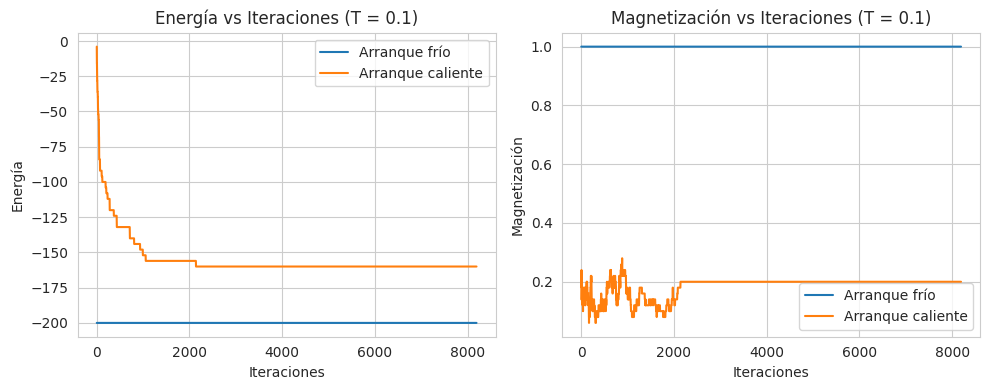

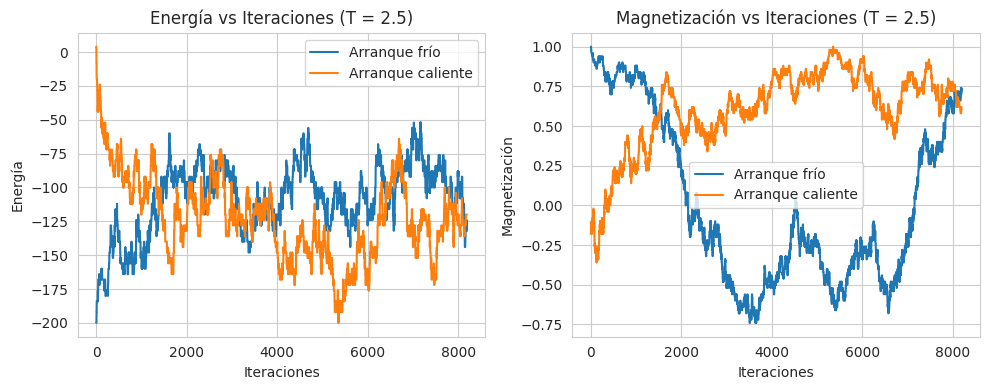

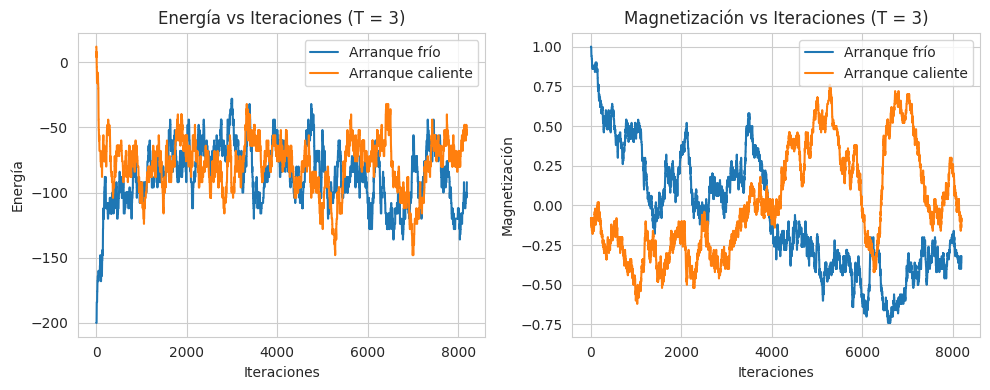

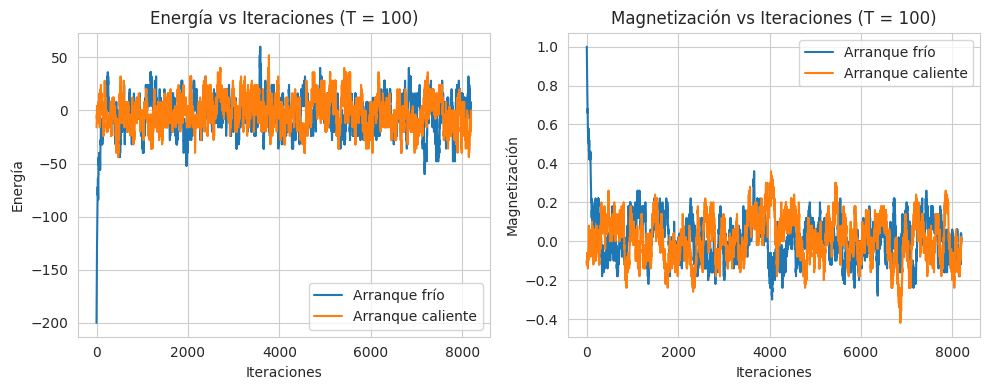

In [ ]:
#======================================================================
# ================== Visualización de resultados  ====================
#======================================================================
for i, T in enumerate(temperaturas):
    plt.figure(figsize=(10, 4))
    # Energía
    plt.subplot(1, 2, 1)
    plt.plot(results[i]["energies_cold"], label="Arranque frío")
    plt.plot(results[i]["energies_hot"], label="Arranque caliente")
    plt.title(f"Energía vs Iteraciones (T = {T})")
    plt.xlabel("Iteraciones")
    plt.ylabel("Energía")
    plt.legend()

    # Magnetización
    plt.subplot(1, 2, 2)
    plt.plot(results[i]["magnetizations_cold"], label="Arranque frío")
    plt.plot(results[i]["magnetizations_hot"], label="Arranque caliente")
    plt.title(f"Magnetización vs Iteraciones (T = {T})")
    plt.xlabel("Iteraciones")
    plt.ylabel("Magnetización")
    plt.legend()

    plt.tight_layout()
    plt.show()



## Apartado cuatro para el calor específico y la suceptibilidad del sistema

In [ ]:
#======================================================================
# 0======= Calcular calor específico y susceptibilidad ================
#======================================================================
def calculate_specific_heat_and_susceptibility(energies, magnetizations, beta):
    mean_E = np.mean(energies)
    mean_E2 = np.mean(np.square(energies))
    mean_M = np.mean(magnetizations)
    mean_M2 = np.mean(np.square(magnetizations))

    Cv = (beta **2/L**2)* (mean_E2 - mean_E ** 2)
    chi = beta * (mean_M2 - mean_M ** 2)
    return Cv, chi

# === Cálculo de Cv y chi ---
cv_values = []
chi_values = []

for result in results:
    Cv, chi = calculate_specific_heat_and_susceptibility(
        result["energies_cold"], result["magnetizations_cold"], result["beta"]
    )
    cv_values.append(Cv)
    chi_values.append(chi)

# Temperatura crítica teórica
T_critico_teorico = 2 / np.log(1 + np.sqrt(2))
print(f"Temperatura crítica teórica: {T_critico_teorico:.4f}")

# Estimar la temperatura crítica según el calor específico
T_critico = temperaturas[np.argmax(cv_values)]
print(f"Temperatura crítica estimada: {T_critico:.4f}")
# estimar la temperatura crítica según la suceptibilidad del sistema
T_critico_chi = temperaturas[np.argmax(chi_values)]
print(f"Temperatura crítica estimada chi: {T_critico_chi:.4f}")


Temperatura crítica teórica: 2.2692
Temperatura crítica estimada: 3.0000
Temperatura crítica estimada chi: 3.0000


Podemos hacer un analisis más detallado para visualisar estos resultados, modificando el modelo de ising para un rango más pequeño, con otras temperaturas (aunque demore más tiempo aproximadamente 3 minutos).

Temperatura crítica teórica: 2.2692


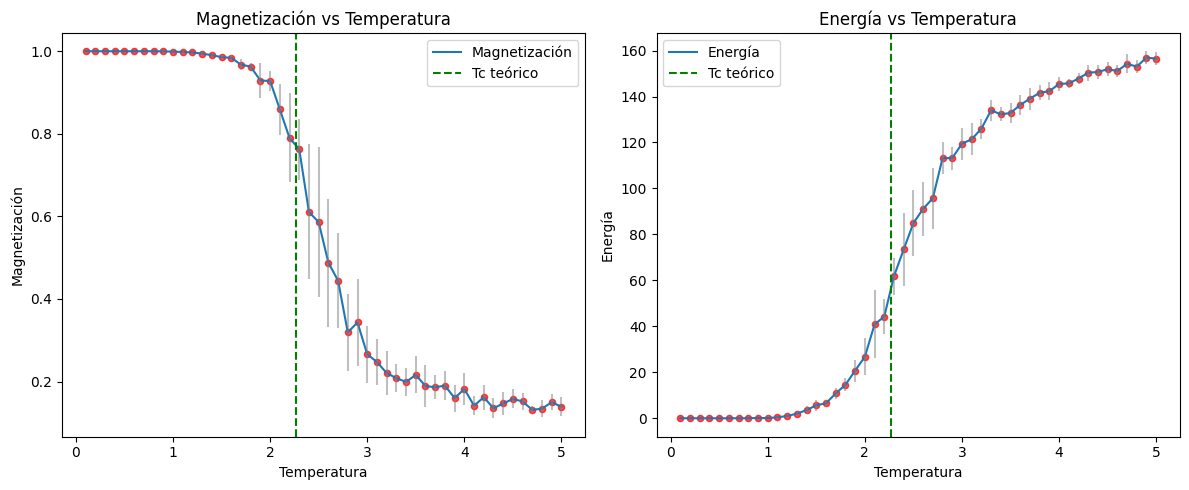

In [ ]:
#============================================================================
# ================ modelo de ising más detallado =============================
#============================================================================

def simular_modelo_ising_detallado(L=10, J=1, H=0, temperaturas=None):
    if temperaturas is None:
        temperaturas = np.linspace(0.1, 5, 50)  # Rango más fino de temperaturas

    magnetizaciones = []
    magnetizaciones_std = []

    iterations = 2**13

    for T in temperaturas:
        beta = 1/T

        # Múltiples corridas para obtener estadística
        magnetizaciones_corrida = []

        # Realizar 10 corridas para cada temperatura
        for _ in range(10):
            # Arranque frío
            lattice_cold = np.ones((L, L))

            # Metropolis
            _, magnetizations_cold, _ = metropolis(lattice_cold, J, H, beta, iterations)

            # Tomar la segunda mitad de las magnetizaciones para reducir efectos transitorios
            magnetizaciones_corrida.append(np.mean(np.abs(magnetizations_cold[len(magnetizations_cold)//2:])))

        # Calcular promedio y desviación estándar de las magnetizaciones
        magnetizaciones.append(np.mean(magnetizaciones_corrida))
        magnetizaciones_std.append(np.std(magnetizaciones_corrida))

    return np.array(temperaturas), np.array(magnetizaciones), np.array(magnetizaciones_std)

def metropolis(lattice, J, H, beta, iterations):
    L = lattice.shape[0]
    energy = calculate_energy(lattice, J, H)
    magnetization = calculate_magnetization(lattice)
    energies = [energy]
    magnetizations = [magnetization]

    for _ in range(iterations):
        i, j = np.random.randint(0, L, 2)
        spin = lattice[i, j]
        neighbors = (
            lattice[(i + 1) % L, j] +
            lattice[(i - 1) % L, j] +
            lattice[i, (j + 1) % L] +
            lattice[i, (j - 1) % L]
        )
        delta_E = 2 * J * spin * neighbors + 2 * H * spin
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            lattice[i, j] = -spin
            energy += delta_E
            magnetization += 2 * lattice[i, j] / lattice.size

        energies.append(energy)
        magnetizations.append(magnetization)

    return energies, magnetizations, lattice

# Parámetros de simulación
L = 10  # Tamaño de la red
J = 1   # Constante de intercambio
H = 0   # Campo magnético

# Realizar simulación
temperaturas, magnetizaciones, magnetizaciones_std = simular_modelo_ising_detallado(L, J, H)

# Punto crítico teórico

print(f"Temperatura crítica teórica: {T_critico_teorico:.4f}")

# Visualización
plt.figure(figsize=(12, 5))

# Magnetización vs Temperatura
plt.subplot(1, 2, 1)
plt.plot(temperaturas, magnetizaciones, '-', label='Magnetización')
plt.scatter(temperaturas, magnetizaciones, s=20, color='red', alpha=0.7)
plt.errorbar(temperaturas, magnetizaciones, yerr=magnetizaciones_std,
             fmt='none', ecolor='gray', alpha=0.5)
plt.axvline(x=T_critico_teorico, color='green', linestyle='--', label='Tc teórico')
plt.title('Magnetización vs Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Magnetización')
plt.legend()

# Energía vs Temperatura (similarmente)
energias = []
energias_std = []

for T in temperaturas:
    beta = 1/T
    energias_corrida = []

    for _ in range(10):
        lattice_cold = np.ones((L, L))
        energies_cold, _, _ = metropolis(lattice_cold, J, H, beta, 2**13)
        energias_corrida.append(np.mean(energies_cold[len(energies_cold)//2:]))

    energias.append(np.mean(energias_corrida))
    energias_std.append(np.std(energias_corrida))

plt.subplot(1, 2, 2)
plt.plot(temperaturas, energias, '-', label='Energía')
plt.scatter(temperaturas, energias, s=20, color='red', alpha=0.7)
plt.errorbar(temperaturas, energias, yerr=energias_std,
             fmt='none', ecolor='gray', alpha=0.5)
plt.axvline(x=T_critico_teorico, color='green', linestyle='--', label='Tc teórico')
plt.title('Energía vs Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Energía')
plt.legend()

plt.tight_layout()
plt.show()

## Parte 2 Transición de fase ferromagnética:

En este apartado tenemos los siguientes apartados:

1. Verifique este comportamiento numéricamente. Para esto, tomamos redes con tamaños $L = 10$ hasta $L =30$ con $TT = 2^{ 13}. $ La temperatura se toma en el rango de $T =T_c -10^{-2} n $, con $n = -50,-49, \cdots,  49, 50.$ trazar el máximo de $C_v/L^2 $ respecto de $\ln(L) $.

2. La magnetización ceca (pero aún por debajo )  de la temperatura crítica está dada por:
$$
\frac{\langle M \rangle}{L^2 }  \sim (T_c -T  )^\gamma, \tag{8}
$$
con $\gamma = \frac{1}{8}$. Estudiamos la magnetización cerca de $T_c$ con el fin de determinar el valor de $\gamma $ numéricamente. Tomamos a $L = 30 $ con $TT = 2 ^{13}. $ Entonces trazamos $\langle M \rangle $ contra $T_c- T$ en el rango de $T = T_c- 10^{-3 }n  $, con $n = 0, \cdots, 500.$
3. La susceptibilidad cerca de la temperatura crítica se comporta como
$$
\frac{\chi}{ L^2}\sim |{ T-T_c}|^{\epsilon},  \tag{9}
$$
con $\epsilon = \frac{7}{4}$. Determinar $\epsilon $ numéricamente. Utilizar $TT = 2^{13}, L=30 $ con $T = T_c +0.1 +5 \times10^{-3} n $, con $n = 0, \cdots, 100 $




Entonces hagamos el primer apartado:


Simulaciones: 101 temperaturas
Tiempo total: 3.02 segundos


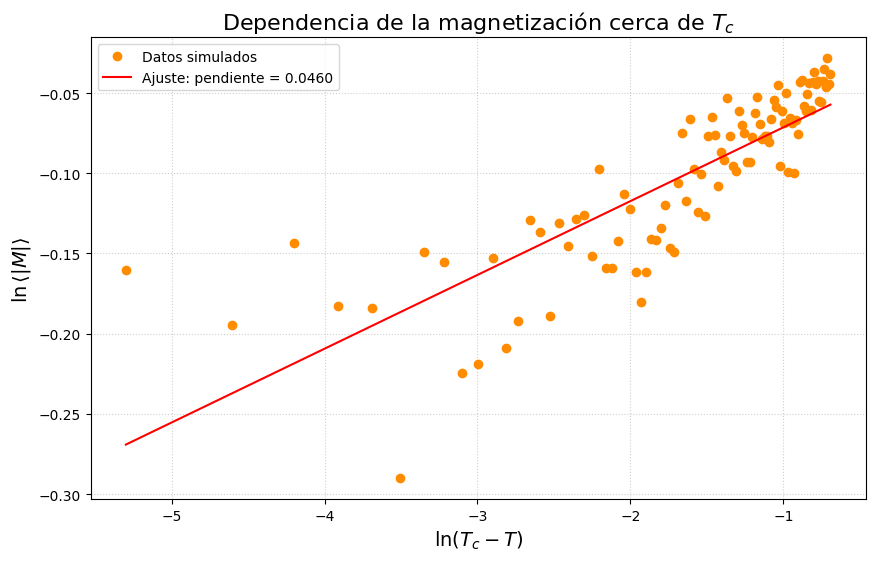

Pendiente del ajuste (gamma estimado): 0.0460
Coeficiente de correlación R²: 0.6798


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numba as nb
import time

@nb.njit
def calculate_magnetization(lattice):
    """Calcula la magnetización por sitio."""
    return np.abs(np.sum(lattice)) / lattice.size

@nb.njit
def metropolis_step(lattice, beta):
    """Realiza un paso de Metrópolis en la red de Ising."""
    L = lattice.shape[0]
    i, j = np.random.randint(0, L, 2)
    spin = lattice[i, j]
    neighbors = (
        lattice[(i + 1) % L, j] +
        lattice[(i - 1) % L, j] +
        lattice[i, (j + 1) % L] +
        lattice[i, (j - 1) % L]
    )
    delta_E = 2 * spin * neighbors
    if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
        lattice[i, j] *= -1

def magnetization_simulation(L, beta, TT=2**14):
    """Simulación del modelo de Ising para magnetización."""
    lattice = np.ones((L, L))  # Inicializar todos los spins en +1
    magnetizations = []
    for t in range(TT):
        metropolis_step(lattice, beta)
        if t >= TT // 2:  # Descartar los primeros TT/2 pasos para equilibrio
            magnetizations.append(calculate_magnetization(lattice))
    return np.mean(magnetizations)

# Parámetros de simulación
L = 30
Tc = 2 / np.log(1 + np.sqrt(2))  # Tc teórica ≈ 2.269
temps = [Tc - 0.001 * n for n in range(0, 501, 5)]
magnetizaciones = []

# Ejecutar simulaciones y medir tiempo
print(f"Simulaciones: {len(temps)} temperaturas")
t0 = time.time()
for T in temps:
    beta = 1 / T
    mag = magnetization_simulation(L, beta)
    magnetizaciones.append(mag)
t1 = time.time()
print(f"Tiempo total: {t1 - t0:.2f} segundos")

# Filtrar para log-log solo cuando T < Tc
T_diff = np.array([Tc - T for T in temps])
ln_T_diff = np.log(T_diff[T_diff > 0])
ln_M = np.log(np.array(magnetizaciones)[T_diff > 0])

# Ajuste lineal log-log
pendiente, intercepto, r_valor, p_valor, std_err = stats.linregress(ln_T_diff, ln_M)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ln_T_diff, ln_M, 'o', color='darkorange', label='Datos simulados')
plt.plot(ln_T_diff, pendiente * ln_T_diff + intercepto, 'r-', label=f'Ajuste: pendiente = {pendiente:.4f}')
plt.xlabel(r'$\ln(T_c - T)$', fontsize=14)
plt.ylabel(r'$\ln \langle |M| \rangle$', fontsize=14)
plt.title('Dependencia de magnetización cerca de $T_c$', fontsize=16)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

# Resultados
print(f"Pendiente del ajuste (gamma estimado): {pendiente:.4f}")
print(f"Coeficiente de correlación R²: {r_valor**2:.4f}")


Pendiente del ajuste (esperado ε = 7/4): 1.1692629886840649
Coeficiente de correlación: 0.5533933154030818


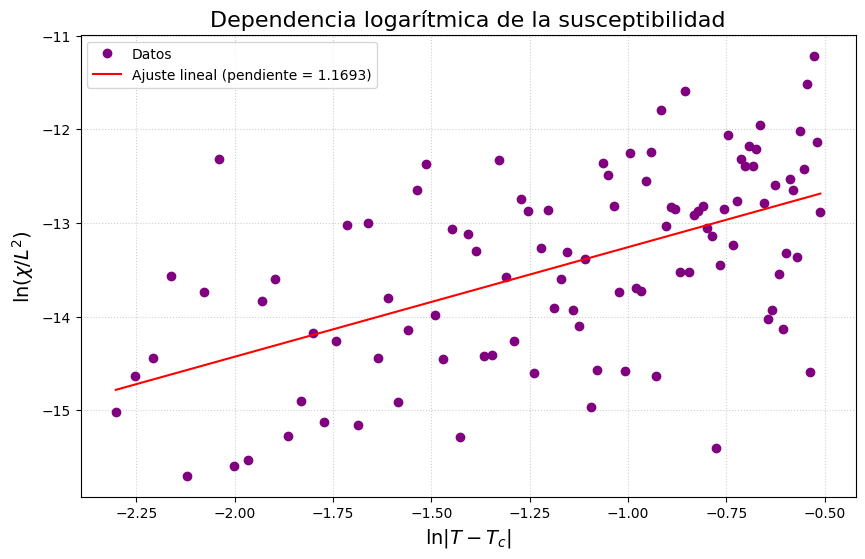

In [ ]:
def calculate_susceptibility(lattice, magnetizations):
    """Calcula la susceptibilidad por sitio."""
    mean_m2 = np.mean(np.square(magnetizations))
    mean_m = np.mean(magnetizations)
    susceptibility = (mean_m2 - mean_m ** 2) / lattice.size
    return susceptibility

def susceptibility_simulation(L, beta, TT=2**13):
    """Simulación de Metrópolis para calcular susceptibilidad."""
    lattice = np.ones((L, L))  # Inicialización de la red con todos los spins arriba
    magnetizations = []

    for _ in range(TT):
        # Selección aleatoria de spin
        i, j = np.random.randint(0, L, 2)

        # Cálculo del cambio de energía
        spin = lattice[i, j]
        neighbors = (
            lattice[(i + 1) % L, j] +
            lattice[(i - 1) % L, j] +
            lattice[i, (j + 1) % L] +
            lattice[i, (j - 1) % L]
        )
        delta_E = 2 * spin * neighbors

        # Criterio de Metropolis
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            lattice[i, j] *= -1

        # Registrar magnetización
        if _ >= TT // 2:  # Descartamos la mitad inicial para equilibrar
            magnetizations.append(np.sum(lattice) / lattice.size)

    susceptibility = calculate_susceptibility(lattice, magnetizations)
    return susceptibility

# Parámetros de la simulación
L = 30
Tc = 2 / np.log(1 + np.sqrt(2))  # Temperatura crítica teórica
n_values = np.arange(101)
temperaturas = Tc + 0.1 + 0.005 * n_values

susceptibilidades = []
for T in temperaturas:
    beta = 1 / T
    chi = susceptibility_simulation(L, beta)
    susceptibilidades.append(chi)

# Ajuste para determinar el exponente epsilon
delta_T = np.abs(temperaturas - Tc)
log_delta_T = np.log(delta_T)
log_susceptibilidad = np.log(susceptibilidades)

pendiente, intercepto, r_valor, p_valor, std_err = stats.linregress(log_delta_T, log_susceptibilidad)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(log_delta_T, log_susceptibilidad, 'o', color='purple', label='Datos')
plt.plot(log_delta_T, pendiente * log_delta_T + intercepto, 'r-',
         label=f'Ajuste lineal (pendiente = {pendiente:.4f})')
plt.xlabel(r'$\ln|T - T_c|$', fontsize=14)
plt.ylabel(r'$\ln(\chi / L^2)$', fontsize=14)
plt.title('Dependencia logarítmica de la susceptibilidad', fontsize=16)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

# Información adicional
print(f"Pendiente del ajuste (esperado ε = 7/4): {pendiente}")
print(f"Coeficiente de correlación: {r_valor}")
plt.show()


In [1]:
# Importación de Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import scipy.stats as stats
import time


In [2]:
#===================================================================
# Usamos numba para optimizar los calculos numericos
#===================================================================
@njit
def calculate_energy(lattice, L, J=1, H=0):
    """Calcula la energía total de la red."""
    energy = 0
    for i in range(L):
        for j in range(L):
            spin = lattice[i, j]
            neighbors = (
                lattice[(i + 1) % L, j] +
                lattice[(i - 1) % L, j] +
                lattice[i, (j + 1) % L] +
                lattice[i, (j - 1) % L]
            )
            energy += -J * spin * neighbors - H * spin
    return energy / 2

@njit
def calculate_magnetization(lattice):
    """Calcula la magnetización por sitio."""
    return np.abs(np.sum(lattice)) / lattice.size


## 1. Vereficamos la relación entre el máximo $C_V$ y $\ln(L)$

In [3]:
@njit
def metropolis_simulation(L, beta, TT=2**13, J=1, H=0):
    """Simulación del modelo de Ising usando Metropolis."""
    lattice = np.ones((L, L))
    energy = calculate_energy(lattice, L)
    energies = np.zeros(TT)

    for t in range(TT):
        i, j = np.random.randint(0, L, 2)
        spin = lattice[i, j]
        neighbors = (
            lattice[(i + 1) % L, j] +
            lattice[(i - 1) % L, j] +
            lattice[i, (j + 1) % L] +
            lattice[i, (j - 1) % L]
        )
        delta_E = 2 * J * spin * neighbors
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            lattice[i, j] *= -1
            energy += delta_E

        if t >= TT // 2:  # Solo se registra energía en la mitad final
            energies[t - TT // 2] = energy

    return energies

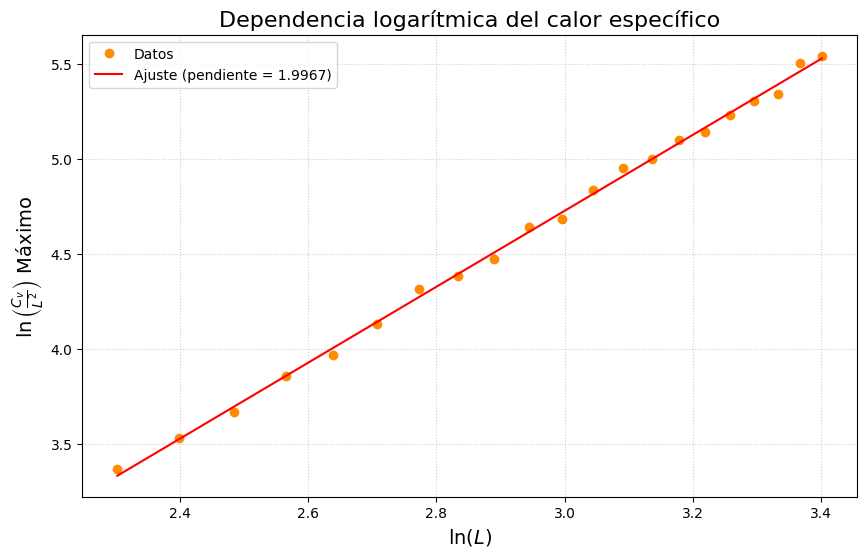

Pendiente del ajuste: 1.9967
Coeficiente de correlación: 0.9991


In [4]:
# Parámetros de simulación
L_values = np.arange(10, 31,1)
Tc = 2 / np.log(1 + np.sqrt(2))  # Temperatura crítica teórica
n_values = np.arange(-50, 51,5)
temperaturas = Tc - 0.01 * n_values
TT = 2**13
max_cv_per_L2 = []

# Bucle sobre los tamaños de red y temperaturas
for L in L_values:
    Cv_valores = []
    for T in temperaturas:
        beta = 1 / T
        energies = metropolis_simulation(L, beta, TT)
        E_mean = np.mean(energies)
        E2_mean = np.mean(energies ** 2)
        Cv = (beta**2) * (E2_mean - E_mean**2) / (L**2)
        Cv_valores.append(Cv)

    max_cv_per_L2.append(np.max(Cv_valores))

# Gráfica y ajuste
ln_L = np.log(L_values)
log_max_cv = np.log(max_cv_per_L2)
pendiente, intercepto, r_valor, p_valor, std_err = stats.linregress(ln_L, log_max_cv)

plt.figure(figsize=(10, 6))
plt.plot(ln_L, log_max_cv, 'o', color='darkorange', label='Datos')
plt.plot(ln_L, pendiente * ln_L + intercepto, 'r-', label=f'Ajuste (pendiente = {pendiente:.4f})')
plt.xlabel(r'$\ln(L)$', fontsize=14)
plt.ylabel(r'$\ln\left(\frac{C_v}{L^2}\right)$ Máximo', fontsize=14)
plt.title('Dependencia logarítmica del calor específico', fontsize=16)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

print(f"Pendiente del ajuste: {pendiente:.4f}")
print(f"Coeficiente de correlación: {r_valor:.4f}")


##2. Determinar $\gamma$

In [5]:
@njit
def metropolis_step(lattice, beta):
    L = lattice.shape[0]
    i, j = np.random.randint(0, L, 2)
    spin = lattice[i, j]
    neighbors = (
        lattice[(i + 1) % L, j] +
        lattice[(i - 1) % L, j] +
        lattice[i, (j + 1) % L] +
        lattice[i, (j - 1) % L]
    )
    delta_E = 2 * spin * neighbors
    if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
        lattice[i, j] *= -1


In [6]:
def magnetization_simulation(L, beta, TT=2**14):
    lattice = np.ones((L, L))
    magnetizations = []
    for t in range(TT):
        metropolis_step(lattice, beta)
        if t >= TT // 2:
            magnetizations.append(calculate_magnetization(lattice))
    return np.mean(magnetizations)


Simulaciones: 101 temperaturas
Tiempo total: 4.39 segundos


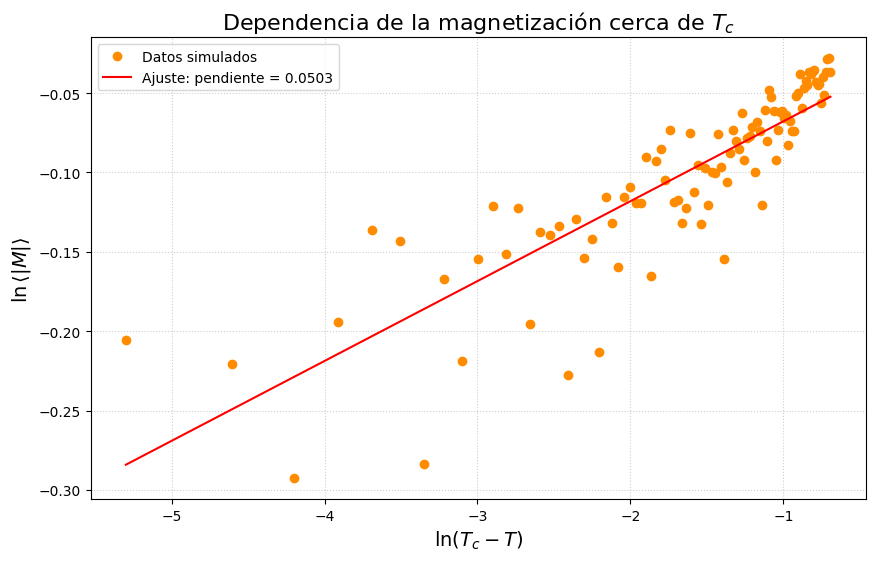

Pendiente del ajuste (gamma estimado): 0.0503
Coeficiente de correlación R²: 0.7295


In [7]:
#Ahora graficamos la magnetización

# Parámetros de simulación
L = 30
Tc = 2 / np.log(1 + np.sqrt(2))  # Tc teórica ≈ 2.269
temps = [Tc - 0.001 * n for n in range(0, 501, 5)]
magnetizaciones = []

# Ejecutar simulaciones y medir tiempo
print(f"Simulaciones: {len(temps)} temperaturas")
t0 = time.time()
for T in temps:
    beta = 1 / T
    mag = magnetization_simulation(L, beta)
    magnetizaciones.append(mag)
t1 = time.time()
print(f"Tiempo total: {t1 - t0:.2f} segundos")

# Filtrar para log-log solo cuando T < Tc
T_diff = np.array([Tc - T for T in temps])
ln_T_diff = np.log(T_diff[T_diff > 0])
ln_M = np.log(np.array(magnetizaciones)[T_diff > 0])

# Ajuste lineal log-log
pendiente, intercepto, r_valor, p_valor, std_err = stats.linregress(ln_T_diff, ln_M)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(ln_T_diff, ln_M, 'o', color='darkorange', label='Datos simulados')
plt.plot(ln_T_diff, pendiente * ln_T_diff + intercepto, 'r-', label=f'Ajuste: pendiente = {pendiente:.4f}')
plt.xlabel(r'$\ln(T_c - T)$', fontsize=14)
plt.ylabel(r'$\ln \langle |M| \rangle$', fontsize=14)
plt.title('Dependencia de la magnetización cerca de $T_c$', fontsize=16)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

# Resultados
print(f"Pendiente del ajuste (gamma estimado): {pendiente:.4f}")
print(f"Coeficiente de correlación R²: {r_valor**2:.4f}")




Pendiente del ajuste (esperado ε = 7/4): 1.2285958111544182
Coeficiente de correlación: 0.5817547674472437


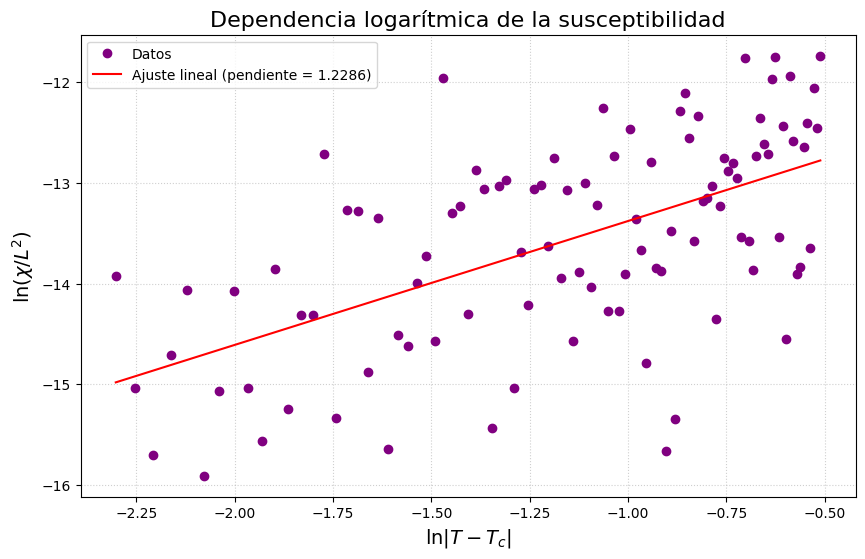

In [8]:
def calculate_susceptibility(lattice, magnetizations):
    """Calcula la susceptibilidad por sitio."""
    mean_m2 = np.mean(np.square(magnetizations))
    mean_m = np.mean(magnetizations)
    susceptibility = (mean_m2 - mean_m ** 2) / lattice.size
    return susceptibility

def susceptibility_simulation(L, beta, TT=2**13):
    """Simulación de Metrópolis para calcular susceptibilidad."""
    lattice = np.ones((L, L))  # Inicialización de la red con todos los spins arriba
    magnetizations = []

    for _ in range(TT):
        # Selección aleatoria de spin
        i, j = np.random.randint(0, L, 2)

        # Cálculo del cambio de energía
        spin = lattice[i, j]
        neighbors = (
            lattice[(i + 1) % L, j] +
            lattice[(i - 1) % L, j] +
            lattice[i, (j + 1) % L] +
            lattice[i, (j - 1) % L]
        )
        delta_E = 2 * spin * neighbors

        # Criterio de Metropolis
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            lattice[i, j] *= -1

        # Registrar magnetización
        if _ >= TT // 2:  # Descartamos la mitad inicial para equilibrar
            magnetizations.append(np.sum(lattice) / lattice.size)

    susceptibility = calculate_susceptibility(lattice, magnetizations)
    return susceptibility

# Parámetros de la simulación
L = 30
Tc = 2 / np.log(1 + np.sqrt(2))  # Temperatura crítica teórica
n_values = np.arange(101)
temperaturas = Tc + 0.1 + 0.005 * n_values

susceptibilidades = []
for T in temperaturas:
    beta = 1 / T
    chi = susceptibility_simulation(L, beta)
    susceptibilidades.append(chi)

# Ajuste para determinar el exponente epsilon
delta_T = np.abs(temperaturas - Tc)
log_delta_T = np.log(delta_T)
log_susceptibilidad = np.log(susceptibilidades)

pendiente, intercepto, r_valor, p_valor, std_err = stats.linregress(log_delta_T, log_susceptibilidad)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(log_delta_T, log_susceptibilidad, 'o', color='purple', label='Datos')
plt.plot(log_delta_T, pendiente * log_delta_T + intercepto, 'r-',
         label=f'Ajuste lineal (pendiente = {pendiente:.4f})')
plt.xlabel(r'$\ln|T - T_c|$', fontsize=14)
plt.ylabel(r'$\ln(\chi / L^2)$', fontsize=14)
plt.title('Dependencia logarítmica de la susceptibilidad', fontsize=16)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

# Información adicional
print(f"Pendiente del ajuste (esperado ε = 7/4=1.75 ): {pendiente}")
print(f"Coeficiente de correlación: {r_valor}")
plt.show()
